# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [19]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [7]:
cursor = con.cursor()

query = "SELECT MAX(hire_date), MIN(hire_date) FROM employees"
cursor.execute(query)
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

In [23]:
cursor.close()

True

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [17]:
con.close()

In [25]:
cursor = con.cursor()

sql = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM employees.salaries s
INNER JOIN (
    SELECT emp_no, MAX(from_date) AS from_date, MAX(to_date) AS to_date
    FROM employees.salaries
    GROUP BY emp_no
) AS max_date ON s.emp_no = max_date.emp_no AND s.to_date = max_date.to_date AND s.from_date = max_date.from_date;
"""
cursor.execute(sql)

In [27]:
field_names = [i[0] for i in cursor.description]
import pandas as pd
res = pd.DataFrame(cursor.fetchall(), columns=field_names)
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [11]:
res['to_date'] = pd.to_datetime(res['to_date'], errors='coerce')

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [29]:
res['to_date'].dtype

dtype('O')

In [31]:
res['to_date'] = pd.to_datetime(res['to_date'], errors='coerce')

In [33]:
res['to_date'].dtype

dtype('<M8[ns]')

In [37]:
count_to_date_9999 = (res['to_date'] == '9999-01-01').sum()
count_to_date_not_9999 = (res['to_date'] != '9999-01-01').sum()

print(count_to_date_9999)
print(count_to_date_not_9999)

0
300024


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

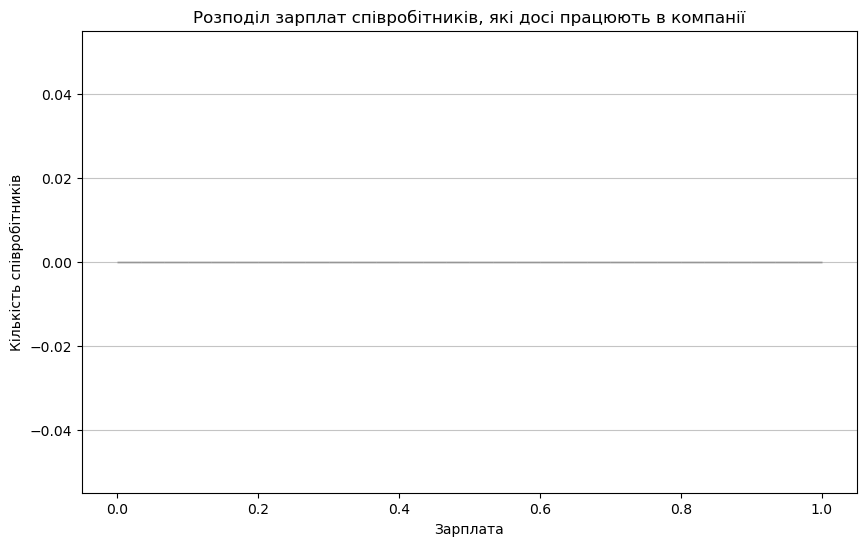

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

active_employees = res[res['to_date'] == '9999-01-01']

plt.figure(figsize=(10, 6))
plt.hist(active_employees['salary'], bins=30, edgecolor='black', alpha=0.7)

plt.title('Розподіл зарплат співробітників, які досі працюють в компанії')
plt.xlabel('Зарплата')
plt.ylabel('Кількість співробітників')
plt.grid(axis='y', alpha=0.75)

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [41]:
con.close()